# unsupervised dimensionality reduction via principal component analysis (PCA)

# 1. Total and explained variance

In [2]:
import pandas as pd
import sklearn as sk
from sklearn.datasets import make_blobs

In [3]:
bulb = make_blobs()

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
df = pd.read_csv(r'C:\Users\ACER\Desktop\pyreach\Life Data\train(1).csv')

In [62]:
df.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [64]:
import numpy as np
paid_mapping = {index: value for index, value in enumerate(np.unique(df['paid']))}

In [65]:
paid_mapping

{0: 'no', 1: 'yes'}

In [68]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['paid'] = label.fit_transform(df['paid'].values)



,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,0,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,0,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,0,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,0,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,0,no,yes,yes,no,4,3,5,0,37


In [69]:
df['activities'] = label.fit_transform(df['activities'].values)
df['nursery'] = label.fit_transform(df['nursery'].values)
df['higher'] = label.fit_transform(df['higher'].values)
df['internet'] = label.fit_transform(df['internet'].values)

In [100]:
df['schoolsup'] = label.fit_transform(df['schoolsup'].values)
df['famsup'] = label.fit_transform(df['famsup'].values)

In [70]:
df.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,0,0,1,1,0,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,0,0,0,1,1,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,0,0,1,1,1,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,0,1,1,1,1,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,0,0,1,1,0,4,3,5,0,37


In [73]:
df['Age'].min(), df['Age'].max()

(10, 17)

In [85]:
df['famsize'].value_counts(), df['Pstatus'].value_counts()

(GT3    234
 LE3     91
 Name: famsize, dtype: int64, T    285
 A     40
 Name: Pstatus, dtype: int64)

# performing one-hot encoding on nominal variables, gender, location e.t.c.

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [109]:
ohe = OneHotEncoder()
df = pd.get_dummies(df) # using the get dummy variable

In [110]:
from sklearn.cross_validation import train_test_split

In [111]:
df.keys()

Index(['S/N', 'Age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'health', 'absences', 'Score',
       'Gender_F', 'Gender_M', 'Location_R', 'Location_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T'],
      dtype='object')

In [112]:
df_data = df[['S/N', 'Age', 'Medu', 'Fedu','traveltime','studytime',
             'failures','schoolsup','famsup','paid','absences','Gender_F',
             'Gender_M','Location_R','Location_U','famsize_GT3','famsize_LE3',
             'Pstatus_A','Pstatus_T', 'activities','nursery','higher','internet',
             'famrel','freetime','health']]

In [113]:
df_target = df['Score']

In [116]:
help (train_test_split)

Help on function train_test_split in module sklearn.cross_validation:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    .. deprecated:: 0.18
        This module will be removed in 0.20.
        Use :func:`sklearn.model_selection.train_test_split` instead.
    
    Quick utility that wraps input validation and
    ``next(iter(ShuffleSplit(n_samples)))`` and application to input
    data into a single call for splitting (and optionally subsampling)
    data in a oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, or None (default is None)
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the test split. If
        

In [117]:
df.shape

(325, 27)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size = 0.3, random_state =20 )

In [121]:
# normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

In [122]:
# similar to MinMaxScaler, scikit-learn also implements a class for
# standardization

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
line = LinearRegression()
line.fit(x_train_std, y_train)
print("Training accuracy: ", line.score(x_train_std, y_train))
print("Test accuracy: ", line.score(x_test_std, y_test))

Training accuracy:  0.415376204582
Test accuracy:  0.300852719703


# Assessing feature importance with randomforest

In [146]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_data
forest = RandomForestClassifier(n_estimators = 100, random_state =20, n_jobs = -1 )

In [150]:
forest.fit(x_train, y_train)
importances = forest.feature_importances_
print (importances)

[ 0.12631756  0.05867177  0.05865067  0.06415296  0.04417934  0.05173377
  0.02097664  0.02126344  0.03070608  0.0139774   0.07630591  0.02375527
  0.02467297  0.01515314  0.01767155  0.01755197  0.01838785  0.01253796
  0.01135475  0.03482106  0.02589724  0.01449257  0.02366644  0.05998024
  0.06548773  0.06763373]


In [153]:
indices = np.argsort(importances)[::-1]
print (indices)

[ 0 10 25 24  3 23  1  2  5  4 19  8 20 12 11 22  7  6 16 14 15 13 21  9 17
 18]


In [205]:
count = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
dict_count = {}
for keys, values in zip(df_data.keys(), count):
    dict_count[keys] = values

print (dict_count)

{'S/N': 0, 'Age': 1, 'Medu': 2, 'Fedu': 3, 'traveltime': 4, 'studytime': 5, 'failures': 6, 'schoolsup': 7, 'famsup': 8, 'paid': 9, 'absences': 10, 'Gender_F': 11, 'Gender_M': 12, 'Location_R': 13, 'Location_U': 14, 'famsize_GT3': 15, 'famsize_LE3': 16, 'Pstatus_A': 17, 'Pstatus_T': 18, 'activities': 19, 'nursery': 20, 'higher': 21, 'internet': 22, 'famrel': 23, 'freetime': 24, 'health': 25}


In [213]:
def find_key(value_dict,value):
    count = 0
    for this in value_dict.keys():
        if value_dict[this] == value:
            return str(this)
            count += 1
        else:
            count += 1

In [217]:
indices = np.argsort(importances)[::-1]
print (indices)
new_list = []
for k in indices:
    keyvalue = find_key(dict_count, k)
    new_list.append(keyvalue)
    
print (new_list)

[ 0 10 25  3 24  2  1 23  5  4 19  8 20 11 12 22  6  7 15 16 14 13 21  9 18
 17]
['S/N', 'absences', 'health', 'Fedu', 'freetime', 'Medu', 'Age', 'famrel', 'studytime', 'traveltime', 'activities', 'famsup', 'nursery', 'Gender_F', 'Gender_M', 'internet', 'failures', 'schoolsup', 'famsize_GT3', 'famsize_LE3', 'Location_U', 'Location_R', 'higher', 'paid', 'Pstatus_T', 'Pstatus_A']


In [221]:
feature_dict = {}
for values, imp in zip(new_list,importances *100):
    print (values, "   "*5, imp)
    feature_dict[values] = imp

S/N                 12.8168664973
absences                 6.04496722128
health                 6.09037738084
Fedu                 6.45092547677
freetime                 4.15614425908
Medu                 5.21232202591
Age                 2.03457369171
famrel                 2.01109441947
studytime                 3.06511005935
traveltime                 1.25999349917
activities                 7.9572664476
famsup                 2.45706264492
nursery                 2.44869499564
Gender_F                 1.68429574378
Gender_M                 1.6869636925
internet                 1.9351040643
failures                 1.92334569993
schoolsup                 1.20060528022
famsize_GT3                 1.20917091969
famsize_LE3                 3.3971247928
Location_U                 2.58655199505
Location_R                 1.4730581715
higher                 2.32680269642
paid                 5.68941083491
Pstatus_T                 6.40829229024
Pstatus_A                 6.4738751996


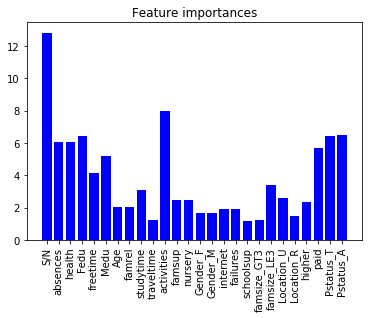

In [246]:
import matplotlib.pyplot as plt
data = pd.DataFrame(feature_dict, index = feature_dict.keys())
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]),feature_dict.values(), color = 'blue', align = 'center')
plt.xticks(range(x_train.shape[1]),feature_dict.keys(), rotation = 90)
plt.show()


In [280]:
new_data = df_data[['S/N', 'absences','health','Fedu','freetime',
                   'activities','paid','Pstatus_T','Medu','studytime',
                   'Pstatus_A','famsize_LE3']]

new_target = df_target

In [281]:
from sklearn.cross_validation import train_test_split

In [282]:
x_train, x_test, y_train, y_test = train_test_split(new_data, new_target, test_size = 0.3,
                                                   random_state = 20)


In [283]:
from sklearn.linear_model import LinearRegression

In [284]:
# normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

In [285]:
# similar to MinMaxScaler, scikit-learn also implements a class for
# standardization

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

In [286]:
line = LinearRegression()
line.fit(x_train_std, y_train)
print("Training accuracy: ", line.score(x_train_std, y_train))
print("Test accuracy: ", line.score(x_test_std, y_test))

Training accuracy:  0.210025988776
Test accuracy:  0.0998647754192
